In [3]:
import os
os.chdir("/Users/nickl/Documents/College/DATA 481 - Gene Data")

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [5]:
#loading filtered gene expression dataset with 2000 genes
df = pd.read_csv("filtered_gene_expression.csv")
df.shape

(783, 2001)

In [6]:
df.head()

,Unnamed: 0,ENSG00000110484,ENSG00000173467,ENSG00000160180,ENSG00000106541,ENSG00000086548,ENSG00000186081,ENSG00000164128,ENSG00000082175,ENSG00000012223,...,ENSG00000183579,ENSG00000111640,ENSG00000141582,ENSG00000083444,ENSG00000077238,ENSG00000131378,ENSG00000162627,ENSG00000172428,ENSG00000090238,ENSG00000121310
0,TCGA-B6-A0IG-01A-11R-A034-07,16.604568,13.223057,16.503468,16.406028,16.432548,12.923043,6.321402,10.431743,12.610098,...,9.498140,16.407849,11.891926,13.235186,12.394746,9.942146,8.553333,11.502764,10.531759,10.892306
1,TCGA-BH-A0HQ-01A-11R-A034-07,17.999684,12.796037,15.401028,15.135256,10.963789,13.592751,9.657230,13.523402,13.761161,...,9.069928,15.914698,11.445023,13.502874,12.193215,11.164268,10.274965,10.937427,11.517999,12.172644
2,TCGA-BH-A18G-01A-11R-A12D-07,11.449702,3.660178,0.000000,5.166983,10.137522,10.144959,14.228891,5.449170,18.585784,...,9.609232,18.279752,10.998696,15.340948,12.148326,10.899602,10.838234,11.463646,12.285856,10.922859
3,TCGA-A8-A09K-01A-11R-A00Z-07,1.675843,13.126475,10.825054,12.800465,4.375425,7.437230,11.509252,9.890669,9.995210,...,12.416744,15.469124,13.226838,11.836395,9.202800,9.810061,10.297798,11.573526,12.778097,12.220035
4,TCGA-BH-A0BZ-01A-31R-A12P-07,8.222050,11.830127,12.560654,14.547573,9.016715,11.662777,9.213446,7.501901,7.631275,...,9.499313,16.135190,12.777781,13.686927,12.581818,11.524712,9.752092,10.692426,11.690135,10.532674


In [7]:
#loading meta dataset
metadf = pd.read_csv("metadata.csv")
metadf.shape 

(783, 7)

In [8]:
#Prepping df to merge with metadf
df.rename(columns={'Unnamed: 0': 'mRNA'}, inplace=True)
df = pd.merge(df, metadf, on =  "mRNA", how='left')
df.set_index("mRNA", inplace=True)
df.shape

(783, 2006)

In [9]:
#Dropping the 20 outliers Minji found using PCs 3 and 4
NoOutdf =  df.drop(['TCGA-06-0211-01B-01R-1849-01', 'TCGA-06-0211-02A-02R-2005-01',
       'TCGA-06-0130-01A-01R-1849-01', 'TCGA-06-0132-01A-02R-1849-01',
       'TCGA-16-1045-01B-01R-1850-01', 'TCGA-06-0125-01A-01R-1849-01',
       'TCGA-06-0125-02A-11R-2005-01', 'TCGA-06-0139-01A-01R-1849-01',
       'TCGA-26-5132-01A-01R-1850-01', 'TCGA-15-1444-01A-02R-1850-01',
       'TCGA-32-2616-01A-01R-1850-01', 'TCGA-06-0750-01A-01R-1849-01',
       'TCGA-41-2572-01A-01R-1850-01', 'TCGA-06-0138-01A-02R-1849-01',
       'TCGA-06-0211-01A-01R-1849-01', 'TCGA-06-0178-01A-01R-1849-01',
       'TCGA-28-2499-01A-01R-1850-01', 'TCGA-06-1804-01A-01R-1849-01',
       'TCGA-26-1442-01A-01R-1850-01', 'TCGA-28-1747-01C-01R-1850-01'], inplace = False)
NoOutdf.shape

(763, 2006)

In [10]:
NoOutdf.to_csv("NoOutliers_filtered_gene_expression.csv")

In [11]:
#setting up x and y for PCA
df = df.dropna(subset=["ER"])

X = df.drop(columns=["PAM50", "TumorPurity", "ProliferationScore", "ER", "PR", "HER2"]) 
y1 = df["ER"] 

X.shape


(672, 2000)

In [12]:
#Finding top 50 PCs and splitting into training and test sets
pca = PCA(n_components=50, random_state = 42)
X_pca1 = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca1, y1, test_size=0.2, random_state=42)

In [13]:
#Setting up model and fitting it
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9185


In [14]:
#Running Cross Validation on logreg
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X_pca1, y1, cv=cv, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")


Cross-validation accuracy scores: [0.91111111 0.91111111 0.92537313 0.90298507 0.91044776]
Mean accuracy: 0.9122


PCA + Logistic Regression on Filtered Gene Expression with Outliers Removed

In [15]:
#setting up x and y for PCA
NoOutdf= NoOutdf.dropna(subset=["ER"])

X = NoOutdf.drop(columns=["PAM50", "TumorPurity", "ProliferationScore", "ER", "PR", "HER2"]) 
y = NoOutdf["ER"] 

X.shape


(652, 2000)

In [16]:
#Finding top 50 PCs and splitting into training and test sets
pca = PCA(n_components=6, random_state = 42)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [17]:
#Setting up model and fitting it
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9389


In [18]:
#Running Cross Validation on logreg
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X_pca, y, cv=cv, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")


Cross-validation accuracy scores: [0.9389313  0.90839695 0.93846154 0.96153846 0.98461538]
Mean accuracy: 0.9464


Running Cross Validation using Minji's 5-Fold Split with outliers removed

In [19]:
from sklearn.model_selection import cross_val_score, PredefinedSplit

In [20]:
#loading datasets
splitdf = pd.read_csv("metadata_randomGroup.csv")
df = pd.read_csv("filtered_gene_expression.csv")
df.rename(columns={'Unnamed: 0': 'mRNA'}, inplace=True)
df.head()
fulldf = pd.merge(df, splitdf, on =  "mRNA", how='left')
fulldf.set_index("mRNA", inplace=True)
#Removing all outliers from dataframe
fulldf = fulldf[fulldf["Group"] != 6]
fulldf =  fulldf.drop(['TCGA-06-0211-01B-01R-1849-01', 'TCGA-06-0211-02A-02R-2005-01',
       'TCGA-06-0130-01A-01R-1849-01', 'TCGA-06-0132-01A-02R-1849-01',
       'TCGA-16-1045-01B-01R-1850-01', 'TCGA-06-0125-01A-01R-1849-01',
       'TCGA-06-0125-02A-11R-2005-01', 'TCGA-06-0139-01A-01R-1849-01',
       'TCGA-26-5132-01A-01R-1850-01', 'TCGA-15-1444-01A-02R-1850-01',
       'TCGA-32-2616-01A-01R-1850-01', 'TCGA-06-0750-01A-01R-1849-01',
       'TCGA-41-2572-01A-01R-1850-01', 'TCGA-06-0138-01A-02R-1849-01',
       'TCGA-06-0211-01A-01R-1849-01', 'TCGA-06-0178-01A-01R-1849-01',
       'TCGA-28-2499-01A-01R-1850-01', 'TCGA-06-1804-01A-01R-1849-01',
       'TCGA-26-1442-01A-01R-1850-01', 'TCGA-28-1747-01C-01R-1850-01'], inplace = False)
#Making the group column zero index
fulldf["Group"] = fulldf["Group"] - 1
#Splitting data and setting up predefined split
group_indices = fulldf['Group'].values  
ps = PredefinedSplit(group_indices)
ps = PredefinedSplit(group_indices)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

cv_scores = cross_val_score(log_reg, X_pca, y, cv=ps, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")


Cross-validation accuracy scores: [0.97101449 0.96666667 0.93478261 0.93478261 0.92372881]
Mean accuracy: 0.9462


Predicting Test Set (Group 6) 

In [26]:
mast_metadf = pd.read_csv("master_metadata.csv")
mast_metadf.head()

,mRNA,PAM50,TumorPurity,ProliferationScore,ER,PR,HER2,file_name_head,dataset,bcr_patient_barcode,hr_missing
0,TCGA-B6-A0IG-01A-11R-A034-07,LumA,0.73,-0.568397,Positive,Positive,Positive,281a89c1-e817-49d4-afa1-2894c2747919,lobular,TCGA-B6-A0IG,False
1,TCGA-BH-A0HQ-01A-11R-A034-07,LumA,0.52,-0.821974,Positive,Positive,Negative,c861f2ac-61fd-45cc-9e14-f775f9eed494,lobular,TCGA-BH-A0HQ,True
2,TCGA-BH-A18G-01A-11R-A12D-07,Basal,0.79,0.423067,Negative,Negative,Negative,deb7967f-9339-4bb1-ae0b-81a72a472bba,lobular,TCGA-BH-A18G,False
3,TCGA-A8-A09K-01A-11R-A00Z-07,LumA,1.00,0.026868,Positive,Positive,Negative,4ab26a32-f816-4aee-9130-12a0b3604db0,lobular,TCGA-A8-A09K,False
4,TCGA-BH-A0BZ-01A-31R-A12P-07,LumB,0.37,0.247682,Positive,Positive,Negative,707fad7d-f284-456a-abfa-17289b40579f,lobular,TCGA-BH-A0BZ,False


In [27]:
#Ensuring all NA values in metadf are filled in by master meta df
metadf = pd.merge(mast_metadf, splitdf[['Group', 'mRNA']], on="mRNA", how='left')
metadf.head()

,mRNA,PAM50,TumorPurity,ProliferationScore,ER,PR,HER2,file_name_head,dataset,bcr_patient_barcode,hr_missing,Group
0,TCGA-B6-A0IG-01A-11R-A034-07,LumA,0.73,-0.568397,Positive,Positive,Positive,281a89c1-e817-49d4-afa1-2894c2747919,lobular,TCGA-B6-A0IG,False,2
1,TCGA-BH-A0HQ-01A-11R-A034-07,LumA,0.52,-0.821974,Positive,Positive,Negative,c861f2ac-61fd-45cc-9e14-f775f9eed494,lobular,TCGA-BH-A0HQ,True,6
2,TCGA-BH-A18G-01A-11R-A12D-07,Basal,0.79,0.423067,Negative,Negative,Negative,deb7967f-9339-4bb1-ae0b-81a72a472bba,lobular,TCGA-BH-A18G,False,2
3,TCGA-A8-A09K-01A-11R-A00Z-07,LumA,1.00,0.026868,Positive,Positive,Negative,4ab26a32-f816-4aee-9130-12a0b3604db0,lobular,TCGA-A8-A09K,False,5
4,TCGA-BH-A0BZ-01A-31R-A12P-07,LumB,0.37,0.247682,Positive,Positive,Negative,707fad7d-f284-456a-abfa-17289b40579f,lobular,TCGA-BH-A0BZ,False,2


In [64]:
df = pd.read_csv("NoOutlier_filtered_normalized.csv")
print(df.shape)
fulldf = pd.merge(df.drop(columns="ER"), metadf[['Group', 'mRNA','ER']], on="mRNA", how='left')
fulldf.set_index("mRNA", inplace=True)
fulldf.head()

(763, 2003)


,ENSG00000110484,ENSG00000173467,ENSG00000160180,ENSG00000106541,ENSG00000086548,ENSG00000186081,ENSG00000164128,ENSG00000082175,ENSG00000012223,ENSG00000151892,...,ENSG00000083444,ENSG00000077238,ENSG00000131378,ENSG00000162627,ENSG00000172428,ENSG00000090238,ENSG00000121310,PAM50,Group,ER
mRNA,,,,,,,,,,,,,,,,,,,,,
TCGA-B6-A0IG-01A-11R-A034-07,16.604568,13.223057,16.503468,16.406028,16.432548,12.923043,6.321402,10.431743,12.610098,15.059847,...,13.235186,12.394746,9.942146,8.553333,11.502764,10.531759,10.892306,LumA,2,Positive
TCGA-BH-A0HQ-01A-11R-A034-07,17.999684,12.796037,15.401028,15.135256,10.963789,13.592751,9.657230,13.523402,13.761161,15.761459,...,13.502874,12.193215,11.164268,10.274965,10.937427,11.517999,12.172644,LumA,6,Positive
TCGA-BH-A18G-01A-11R-A12D-07,11.449702,3.660178,0.000000,5.166983,10.137522,10.144959,14.228891,5.449170,18.585784,8.618219,...,15.340948,12.148326,10.899602,10.838234,11.463646,12.285856,10.922859,Basal,2,Negative
TCGA-A8-A09K-01A-11R-A00Z-07,1.675843,13.126475,10.825054,12.800465,4.375425,7.437230,11.509252,9.890669,9.995210,16.164904,...,11.836395,9.202800,9.810061,10.297798,11.573526,12.778097,12.220035,LumA,5,Positive
TCGA-BH-A0BZ-01A-31R-A12P-07,8.222050,11.830127,12.560654,14.547573,9.016715,11.662777,9.213446,7.501901,7.631275,14.109405,...,13.686927,12.581818,11.524712,9.752092,10.692426,11.690135,10.532674,LumB,2,Positive


In [65]:
#Saving Test Values
testdf = fulldf[fulldf["Group"] == 6]
print(testdf.shape)
test_X = testdf.drop(columns=["PAM50", "ER", "Group"])


(111, 2003)


In [66]:
#Removing all test values from dataframe
traindf = fulldf[fulldf["Group"] != 6]
fulldf.shape

(763, 2003)

In [67]:
#Making the group column zero index
fulldf["Group"] = fulldf["Group"] - 1

In [68]:
#Setting up X and y
X5 = fulldf.drop(columns=["PAM50","ER","Group"]) 
y5 = fulldf["ER"] 

In [74]:

X5_pca = pca.fit_transform(X5)
test_x5 = pca.fit_transform(test_X)


In [75]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X5_pca, y5)


LogisticRegression(max_iter=1000)

In [78]:
test_x5.shape

(111, 6)

In [79]:
missingvalpred = log_reg.predict(test_x5)

In [80]:
test_predicted = pd.DataFrame(missingvalpred, columns=["ER_RF"])
test_predicted["mRNA"] = test_X.index
test_predicted = pd.merge(test_predicted, testdf[['ER']].reset_index(), on="mRNA", how='left')

In [81]:
test_predicted

,ER_RF,mRNA,ER
0,Positive,TCGA-BH-A0HQ-01A-11R-A034-07,Positive
1,Positive,TCGA-A1-A0SD-01A-11R-A115-07,Positive
2,Positive,TCGA-A2-A0CQ-01A-21R-A034-07,Positive
3,Positive,TCGA-A2-A0CS-01A-11R-A115-07,Positive
4,Positive,TCGA-A2-A0YC-01A-11R-A109-07,Positive
...,...,...,...
106,Positive,TCGA-D8-A1XC-01A-11R-A14D-07,Positive
107,Positive,TCGA-E2-A14T-01A-11R-A115-07,Positive
108,Negative,TCGA-E2-A1LG-01A-21R-A14M-07,Negative
109,Positive,TCGA-E9-A54X-01A-11R-A266-07,Positive


In [82]:
print(f"{(test_predicted['ER_RF'] == test_predicted['ER']).sum()} out of {len(test_predicted)} are correct")

100 out of 111 are correct


In [83]:
def check_difference(row):
    if row['ER_RF'] == row['ER']:
        if row['ER'] == 'Positive':
            return "TP (test)"
        elif row['ER'] == 'Negative':
            return "TN (test)"
    elif row['ER'] == 'Positive':
        return "FN (predicted Negative)"
    elif row['ER'] == 'Negative':
        return "FP (predicted Positive)"
    else:
        return -1 

test_predicted['match_code'] = test_predicted.apply(check_difference, axis=1)

In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from matplotlib.lines import Line2D
import seaborn as sns
def plot_pca(data, num_components, mode = "ER", pcs = [1,2], title = "Genes", scale = 7000):
    #PCA on all Genes
    pca = PCA(n_components = num_components) 
    pca_result = pca.fit_transform(data.drop(columns=['ER', 'PAM50']))

    if mode == "ER":
        color_map = {'Positive': 'skyblue', 'Negative': 'pink', 'FP (predicted Positive)': 'blue', 'FN (predicted Negative)': 'red',
                     'TP (test)': 'deepskyblue', 'TN (test)': 'plum'}
        color_plotly = data[mode].fillna('missing')
        color_values = data[mode].map(color_map).fillna('black')
        pink_patch = mpatches.Patch(color='pink', label='Negative (train)')
        skyblue_patch = mpatches.Patch(color='skyblue', label='Positive (train)')
        deepskyblue_patch = mpatches.Patch(color='deepskyblue', label='TP (test)')
        lightcoral_patch = mpatches.Patch(color='plum', label='TN (test)')
        blue_patch = mpatches.Patch(color='blue', label='FP (predicted Positive)')
        red_patch = mpatches.Patch(color='red', label='FN (predicted Negative)')
        patches = [pink_patch, skyblue_patch, deepskyblue_patch, lightcoral_patch, blue_patch, red_patch]
    else:
        color_map = {'LumA': "blue", 'LumB': "green",'Her2': "pink", "Basal":"red", "Normal": "black"}
        color_plotly = data['PAM50']

    
    print("Explained variance ratio by each component:")
    print(pca.explained_variance_ratio_)

    if len(pcs) != 2:
        pca_df = pd.DataFrame(data=pca_result, columns= [f"PC {i+1} ({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)])
        pca_df['label'] = color_plotly.values
        g = sns.pairplot(
            pca_df,
            hue='label',
            corner=True,
            palette= color_map,
            aspect=1.5
        )
        for text in g._legend.texts:
            text.set_fontsize(12)
        g._legend.get_title().set_fontsize(14)

        loadings = pca.components_  # shape: (4, num_features)
        features = [f"gene {i+1}" for i in range(5)]

        ax = g.axes[1, 0]  
        for i, feature in enumerate(features):
            x = loadings[0, i] * scale
            y = loadings[1, i] * scale
            pos = 100 if scale == 7000 else 30
            ax.arrow(pos, pos,x, y, color='black', alpha=0.7, head_width=0.1)
            ax.text(pos+1.1* x, pos+ 1.1*y, feature, color='black', fontsize=9)

        plt.show()
    else:
        pca_df = pd.DataFrame(data=pca_result, columns= [f"PC{i+1}" for i, var in enumerate(pca.explained_variance_ratio_ * 100)])
        pca_df['label'] = color_plotly.values
        plt.figure(figsize=(8, 6))
        #plt.scatter(pca_df[f'PC{pcs[0]}'], pca_df[f'PC{pcs[1]}'], c= color_values)
        train_mask = pca_df['label'].isin(['Positive', 'Negative'])
        plt.scatter(
            pca_df.loc[train_mask, f'PC{pcs[0]}'],
            pca_df.loc[train_mask, f'PC{pcs[1]}'],
            s=15,
            c=pca_df.loc[train_mask, 'label'].map(color_map),
            alpha=0.3, label='Train'
        )
        test_mask = ~train_mask
        plt.scatter(
            pca_df.loc[test_mask, f'PC{pcs[0]}'],
            pca_df.loc[test_mask, f'PC{pcs[1]}'],
            c=pca_df.loc[test_mask, 'label'].map(color_map),
            s=20,
            marker='^',
            alpha=1.0, label='Test'
        )

        plt.title(f"PCA Results on {title}")
        plt.xlabel(f"Principal Component {pcs[0]}")
        plt.ylabel(f"Principal Component {pcs[1]}")

        legend_elements = [
            Line2D([0], [0], marker='o', color='w', label='Positive (train)',
                markerfacecolor=color_map['Positive'], markersize=6, alpha=0.5),
            Line2D([0], [0], marker='o', color='w', label='Negative (train)',
                markerfacecolor=color_map['Negative'], markersize=6, alpha=0.5),
            Line2D([0], [0], marker='^', color='w', label='TP (test)',
                markerfacecolor=color_map['TP (test)'], markersize=8),
            Line2D([0], [0], marker='^', color='w', label='TN (test)',
                markerfacecolor=color_map['TN (test)'], markersize=8),
            Line2D([0], [0], marker='^', color='w', label='FP (predicted Positive)',
                markerfacecolor=color_map['FP (predicted Positive)'], markersize=8),
            Line2D([0], [0], marker='^', color='w', label='FN (predicted Negative)',
                markerfacecolor=color_map['FN (predicted Negative)'], markersize=8),
        ]

        plt.legend(handles=legend_elements, loc='best')
        #plt.legend(handles=patches, loc='upper right', bbox_to_anchor=(1.15, 1))

        plt.show()
    

    return pca_df

In [85]:
test_pca = pd.merge(df, test_predicted[['match_code', 'mRNA']], on="mRNA", how='left')
test_pca.set_index("mRNA", inplace=True)

In [86]:
test_pca['ER'] = np.where(test_pca['match_code'].isna(), test_pca["ER"], test_pca['match_code'])

Explained variance ratio by each component:
[0.17427    0.10200665]


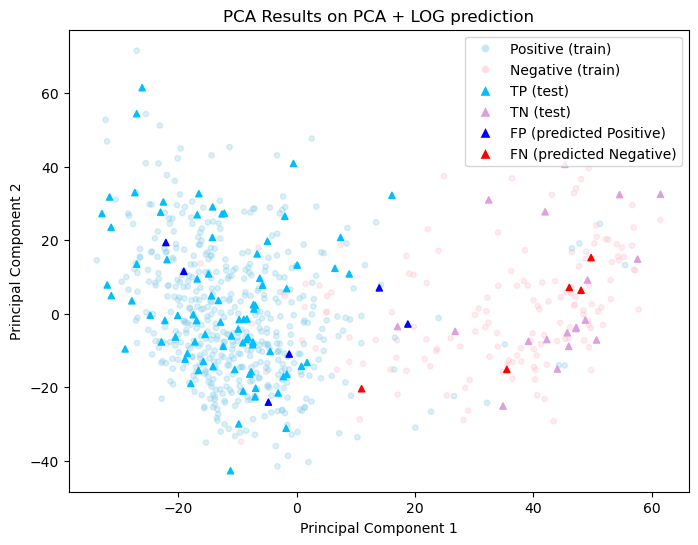

In [88]:
pca_df = plot_pca(test_pca.drop(columns=["match_code"]), 2, pcs = [1,2], mode = 'ER', title = "PCA + LOG prediction", scale = 200)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

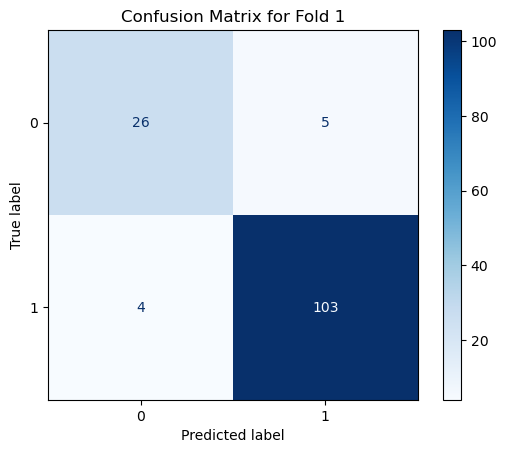

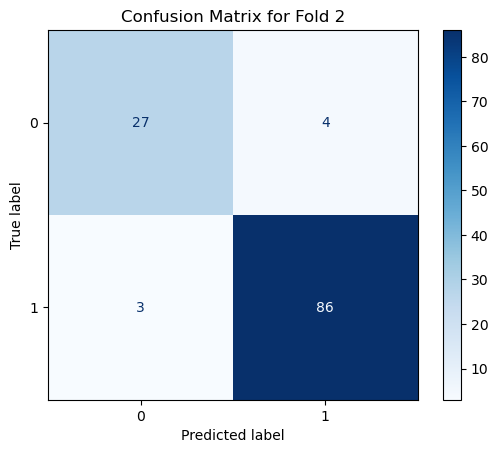

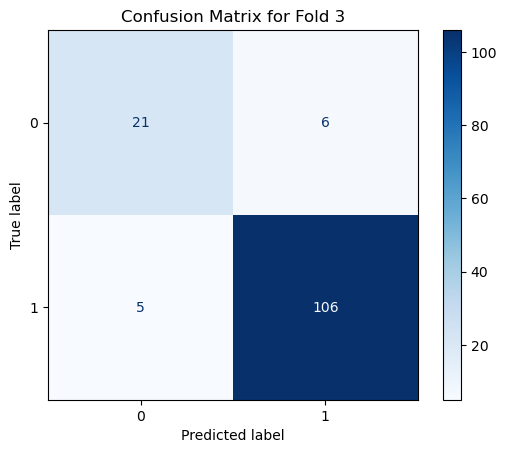

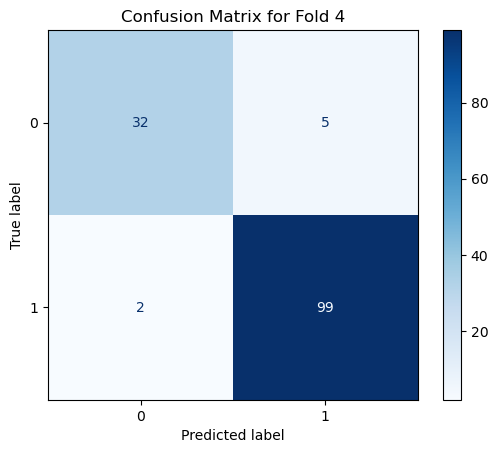

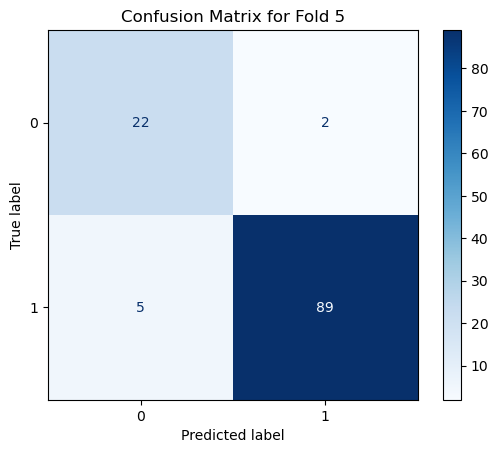

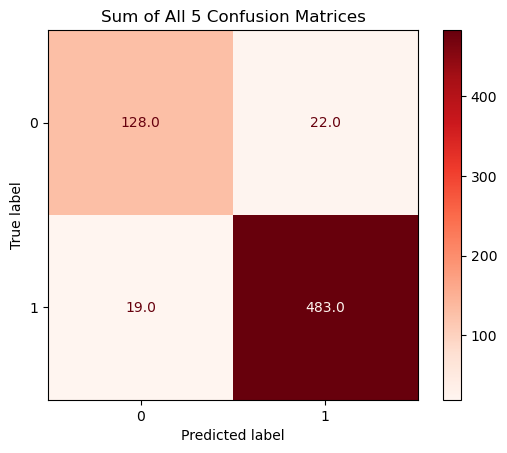

In [ ]:
#Generating Confusion Matrices
#Creating Confusion Matrix
X = np.array(X)
y = np.array(y)
z = np.zeros((2,2))
for fold_idx, (train_idx, test_idx) in enumerate(ps.split(), 1):
    # Split data into train and test
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the model
    log_reg.fit(X_train, y_train)

    # Make predictions
    y_pred = log_reg.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred).astype(int)
    z = z + cm

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for Fold {fold_idx}")
    plt.show()
disp = ConfusionMatrixDisplay(confusion_matrix=z)
disp.plot(cmap="Reds", values_format = "")
plt.title(f"Sum of All 5 Confusion Matrices")
plt.show()

Running Cross Validation using Minji's 5-Fold Split with outliers still present

In [ ]:
#with outliers still present
#loading datasets
splitdf = pd.read_csv("metadata_randomGroup.csv")
df = pd.read_csv("filtered_gene_expression.csv")
df.rename(columns={'Unnamed: 0': 'mRNA'}, inplace=True)
df.head()
fulldf = pd.merge(df, splitdf, on =  "mRNA", how='left')
fulldf.set_index("mRNA", inplace=True)

fulldf = fulldf[fulldf["Group"] != 6]

#Making the group column zero index
fulldf["Group"] = fulldf["Group"] - 1
#Splitting data and setting up predefined split
group_indices = fulldf['Group'].values  
ps = PredefinedSplit(group_indices)

X_train, X_test, y_train, y_test = train_test_split(X_pca1, y1, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

cv_scores = cross_val_score(log_reg, X_pca1, y1, cv=ps, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")


Cross-validation accuracy scores: [0.90780142 0.91056911 0.90909091 0.90780142 0.91129032]
Mean accuracy: 0.9093
